In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords


df = pd.read_csv('/Users/colette/Documents/GitHub/data_science/sentiment labelled sentences/imdb_labelled.txt', sep="\t", header=None)
df.columns = ["review", "rating"]

In [2]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].nunique()))

Unique values in column review are: 745
Unique values in column rating are: 2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
review    748 non-null object
rating    748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [4]:
#no missing values
df.isnull().count()

review    748
rating    748
dtype: int64

In [145]:
df.to_csv('MOIST.csv')

slow:6
moving:4
aimless:1
movie:178
distressed:1
drifting:1
young:3
man:11
ot:11
sure:3
lost:4
flat:2
characters:33
audience:5
nearly:1
half:6
walked:2
ttempting:1
artiness:1
black:6
white:8
clever:4
camera:10
angles:2
disappointed:6
became:2
even:33
ridiculous:5
acting:43
poor:6
plot:27
lines:7
almost:7
non:4
existent:1
ery:5
little:17
music:14
anything:8
speak:3
best:22
scene:14
erardo:1
trying:4
find:10
song:4
keeps:2
running:2
head:3
rest:4
lacks:6
art:11
charm:2
meaning:3
f:25
emptiness:1
works:5
guess:5
empty:2
asted:1
two:12
hours:4
aw:2
today:2
thought:12
good:57
effort:1
messages:1
kids:8
bit:5
predictable:9
oved:1
casting:5
immy:2
uffet:1
science:1
teacher:1
nd:15
baby:1
owls:1
adorable:4
showed:3
lot:8
lorida:1
made:27
look:18
appealing:2
ongs:1
ere:4
est:2
uppets:1
ilarious:1
ool:1
right:13
case:2
delivers:3
everything:9
face:5
average:3
main:3
person:1
low:5
budget:7
clearly:2
see:32
review:2
long:7
overdue:1
since:5
consider:4
ale:1
wo:1
isters:1
single:5
greatest:3
film:

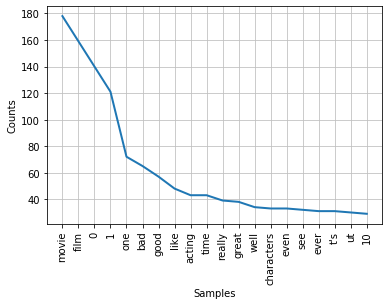

In [19]:
all_words = []

for i, j in df.iterrows():
    text = df['review'][i]
    text.lower() # Convert to lowercase
    words = re.findall("[a-z0-9']+", text) # extract the words
    all_words = all_words + words
    
sr= stopwords.words('english')
clean_tokens = all_words[:]
for word in all_words:
    if word in stopwords.words('english'):
        clean_tokens.remove(word)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [28]:
###ATTEMPT TO COUNT PRESENSE OF MULTIPLE WORDS AT ONCE

rec_key_neg = ['not', 'recommend']
rec_key_pos = ['totally', 'definitely', 'absolutely', 'recommend']

df['rating'] = np.nan

for row in df.iterrows():
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df['neg_rating'] = df['review'][df['review'].str.contains('|'.join(rec_key_neg))]
    df['pos_rating'] = df['review'][df['review'].str.contains('|'.join(rec_key_pos))]
   # if df['rating'][row] = df.review.str.contains(
   #     ' ' + 'not' + ' '
   #     case=False
   # )

In [53]:
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# convert word to lemma

#  "nlp" Object is used to create documents with linguistic annotations.
df['token'] = df.apply(lambda row: nlp(row['review']), axis=1)

In [151]:
neg_keywords = ['not recommend', 'waste', 'bad', 'terribl', 'dissapoint', 'avoid']
pos_keywords = ['recommend', 'entertain', 'love', 'great', 'good', 'brillian']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

NameError: name 'keywords' is not defined

In [131]:
def get_text(df, score):
  # Join together the text in the reviews for a particular tone.
    all_words = []
    
    for i, j in df.iterrows():
        if df['rating'][i] == score:
            text = df['review'][i]
            text.lower() # Convert to lowercase
            words = re.findall("[a-z0-9']+", text) # extract the words
            all_words = all_words + words
    return all_words, Counter(all_words)

def predict(text, counts, class_prob, class_count):
  prediction = 1
  text_counts = Counter(re.split("\s+", text))
  for word in text_counts:
      # For every word in the text, we get the number of times that word occured in the reviews for a given class,
      # add 1 to smooth the value, and divide by the total number of words in the class (plus the class_count to also
      # smooth the denominator).
      # Smoothing ensures that we don't multiply the prediction by 0 if the word didn't exist in the training data.
      # We also smooth the denominator counts to keep things even.
      prediction *=  text_counts.get(word) * ((counts.get(word, 0) + 1) / (sum(counts.values()) + class_count))
  # Now we multiply by the probability of the class existing in the documents.
  return prediction * class_prob

In [119]:
words, word_count = tokenize(df)
neg_text, neg_counts = get_text(df, 0)
pos_text, pos_counts = get_text(df, 1)

In [124]:
neg_review_count = 0
pos_review_count = 0

for i, j in df.iterrows():
    if df['rating'][i] == 0:
        neg_review_count += 1
    elif df['rating'][i] == 1:
        pos_review_count += 1

In [128]:
prob_negative = neg_review_count / len(df['review'])
prob_positive = pos_review_count / len(df['review'])

In [143]:
df['rate'] = np.nan

for i, j in df.iterrows():
    df['neg_prob'][i] = predict(df['review'][i], neg_counts, prob_negative, neg_review_count)
    df['pos_prob'][i] = predict(df['review'][i], pos_counts, prob_positive, pos_review_count)
    if df['pos_prob'][i] > df['neg_prob'][i]:
        df['rate'][i] = 'positive'
    else:
        df['rate'][i] = 'negative'
print('complete')

/Users/colette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/colette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/colette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/colette/anaconda3/lib/python3.7/site-packa

complete


In [148]:
wrong = 18+43
percent_wrong = wrong/len(df['review'])*100

In [149]:
percent_wrong

8.155080213903744